# Problem Statement:
Reliance Stocks prices changes occurred daily.
Make a model to predict the prices for future dates to help the customers to get the stock price hike and decrease in stock prices to invest in particular stocks.

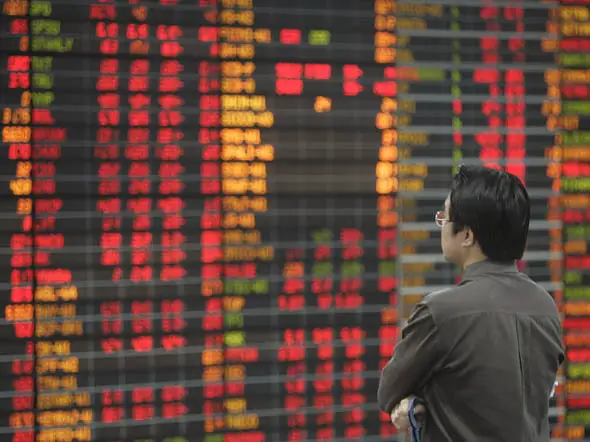

In [215]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [216]:
reliance_0 = pd.read_csv(r"C:\Users\pugal\Documents\DS codes\P-289\Reliance (1).csv")
reliance_0 

,Date,Open,High,Low,Close,Adj Close,Volume
0,18-11-2015,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,19-11-2015,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,20-11-2015,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,23-11-2015,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,24-11-2015,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...,...
1228,10-11-2020,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,11-11-2020,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,12-11-2020,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,13-11-2020,1982.000000,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0


In [217]:
reliance_0.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1223,03-11-2020,1890.000000,1909.000000,1835.099976,1850.400024,1850.400024,40931170.0
1224,04-11-2020,1837.000000,1929.000000,1837.000000,1913.199951,1913.199951,37003111.0
1225,05-11-2020,1954.949951,1960.949951,1932.000000,1955.000000,1955.000000,17170274.0
1226,06-11-2020,1990.000000,2040.000000,1978.150024,2029.150024,2029.150024,30770080.0
1227,09-11-2020,2062.100098,2069.000000,2036.000000,2050.699951,2050.699951,16539467.0
1228,10-11-2020,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,11-11-2020,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,12-11-2020,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,13-11-2020,1982.000000,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0
1232,17-11-2020,2085.000000,2085.000000,1985.000000,1993.250000,1993.250000,21479385.0


# EDA
Analysis is only based on Open, High, Low, close price and volume

There is no need of Adj Close

In [218]:
# Removing "Adj Close" columnfrom dataset
reliance_1=reliance_0.drop(["Adj Close"],axis=1).reset_index(drop=True)
reliance_1

,Date,Open,High,Low,Close,Volume
0,18-11-2015,463.799988,465.649994,454.975006,456.000000,5142766.0
1,19-11-2015,459.450012,469.350006,458.625000,467.375000,5569752.0
2,20-11-2015,467.000000,476.399994,462.774994,473.424988,5167930.0
3,23-11-2015,475.000000,478.950012,473.100006,476.875000,4800026.0
4,24-11-2015,476.500000,485.799988,475.524994,483.850006,6768886.0
...,...,...,...,...,...,...
1228,10-11-2020,2077.000000,2090.000000,2041.199951,2084.550049,17045147.0
1229,11-11-2020,2089.000000,2095.000000,1978.099976,1997.199951,26178477.0
1230,12-11-2020,1981.000000,2008.449951,1965.000000,1980.000000,18481466.0
1231,13-11-2020,1982.000000,2036.650024,1981.750000,1996.400024,20946864.0


In [219]:
# Finding duplicate columns, if any
reliance_1[reliance_1.duplicated()]

,Date,Open,High,Low,Close,Volume


In [220]:
# Finding null values, if any
reliance_1.isnull().sum()

Date      0
Open      1
High      1
Low       1
Close     1
Volume    1
dtype: int64

In [221]:
#To check which rows have any missing value under any column
reliance_1[reliance_1.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Volume
968,27-10-2019,NaN,NaN,NaN,NaN,NaN


In [222]:
# Removing the row which have null value
reliance_2=reliance_1.dropna().reset_index(drop=True)
reliance_2

,Date,Open,High,Low,Close,Volume
0,18-11-2015,463.799988,465.649994,454.975006,456.000000,5142766.0
1,19-11-2015,459.450012,469.350006,458.625000,467.375000,5569752.0
2,20-11-2015,467.000000,476.399994,462.774994,473.424988,5167930.0
3,23-11-2015,475.000000,478.950012,473.100006,476.875000,4800026.0
4,24-11-2015,476.500000,485.799988,475.524994,483.850006,6768886.0
...,...,...,...,...,...,...
1227,10-11-2020,2077.000000,2090.000000,2041.199951,2084.550049,17045147.0
1228,11-11-2020,2089.000000,2095.000000,1978.099976,1997.199951,26178477.0
1229,12-11-2020,1981.000000,2008.449951,1965.000000,1980.000000,18481466.0
1230,13-11-2020,1982.000000,2036.650024,1981.750000,1996.400024,20946864.0


In [223]:
# Checking wether if there exist any null values
reliance_2[reliance_2.isnull().any(axis=1)]

# Making a copy of dataset as reliance
reliance=reliance_2.copy()
reliance

,Date,Open,High,Low,Close,Volume
0,18-11-2015,463.799988,465.649994,454.975006,456.000000,5142766.0
1,19-11-2015,459.450012,469.350006,458.625000,467.375000,5569752.0
2,20-11-2015,467.000000,476.399994,462.774994,473.424988,5167930.0
3,23-11-2015,475.000000,478.950012,473.100006,476.875000,4800026.0
4,24-11-2015,476.500000,485.799988,475.524994,483.850006,6768886.0
...,...,...,...,...,...,...
1227,10-11-2020,2077.000000,2090.000000,2041.199951,2084.550049,17045147.0
1228,11-11-2020,2089.000000,2095.000000,1978.099976,1997.199951,26178477.0
1229,12-11-2020,1981.000000,2008.449951,1965.000000,1980.000000,18481466.0
1230,13-11-2020,1982.000000,2036.650024,1981.750000,1996.400024,20946864.0


# Discriptive Statistics

In [224]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1232 non-null   object 
 1   Open    1232 non-null   float64
 2   High    1232 non-null   float64
 3   Low     1232 non-null   float64
 4   Close   1232 non-null   float64
 5   Volume  1232 non-null   float64
dtypes: float64(5), object(1)
memory usage: 57.9+ KB


In [225]:
reliance.describe()

,Open,High,Low,Close,Volume
count,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03
mean,1036.035414,1048.479285,1023.015573,1035.164502,9.981743e+06
std,463.719976,469.906022,455.946191,462.301697,7.603435e+06
min,459.000000,465.649994,444.049988,453.274994,1.283997e+06
25%,551.925003,561.393768,546.000000,553.049988,5.555522e+06
50%,959.099976,972.474976,946.675018,960.949982,7.560520e+06
75%,1309.024963,1321.649963,1292.274963,1308.337494,1.140781e+07
max,2325.000000,2369.350098,2310.550049,2324.550049,6.523004e+07


In [226]:
# converting the date column in to datetime 

reliance['Date'] = pd.to_datetime(reliance['Date'], format='%d-%m-%Y')
reliance

,Date,Open,High,Low,Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,6768886.0
...,...,...,...,...,...,...
1227,2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,17045147.0
1228,2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,26178477.0
1229,2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,18481466.0
1230,2020-11-13,1982.000000,2036.650024,1981.750000,1996.400024,20946864.0


In [227]:
reliance.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999444,0.999528,0.998973,0.395079
High,0.999444,1.000000,0.999293,0.999607,0.410930
Low,0.999528,0.999293,1.000000,0.999541,0.387160
Close,0.998973,0.999607,0.999541,1.000000,0.401374
Volume,0.395079,0.410930,0.387160,0.401374,1.000000


Every attributes are highly corelated except volume

In [228]:
# Setting the date column as index
reliance=reliance.set_index('Date')
reliance

,Open,High,Low,Close,Volume
Date,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,5142766.0
2015-11-19,459.450012,469.350006,458.625000,467.375000,5569752.0
2015-11-20,467.000000,476.399994,462.774994,473.424988,5167930.0
2015-11-23,475.000000,478.950012,473.100006,476.875000,4800026.0
2015-11-24,476.500000,485.799988,475.524994,483.850006,6768886.0
...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,17045147.0
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,26178477.0
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,18481466.0


# Visualizations

Text(0.5, 1.0, 'Low')

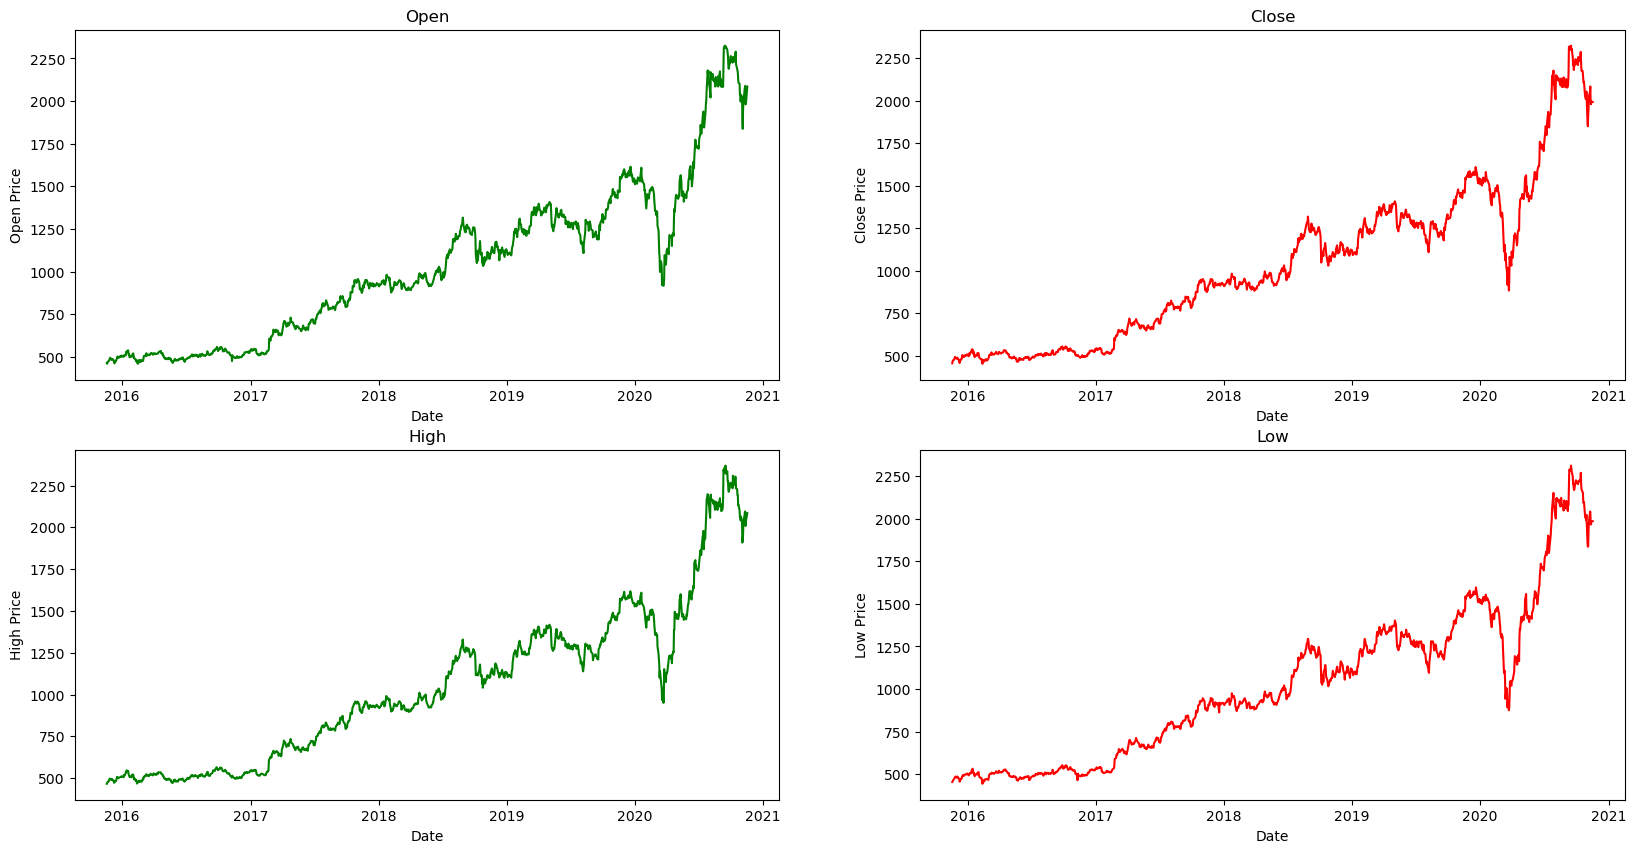

In [229]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(reliance['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(reliance['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(reliance['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(reliance['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

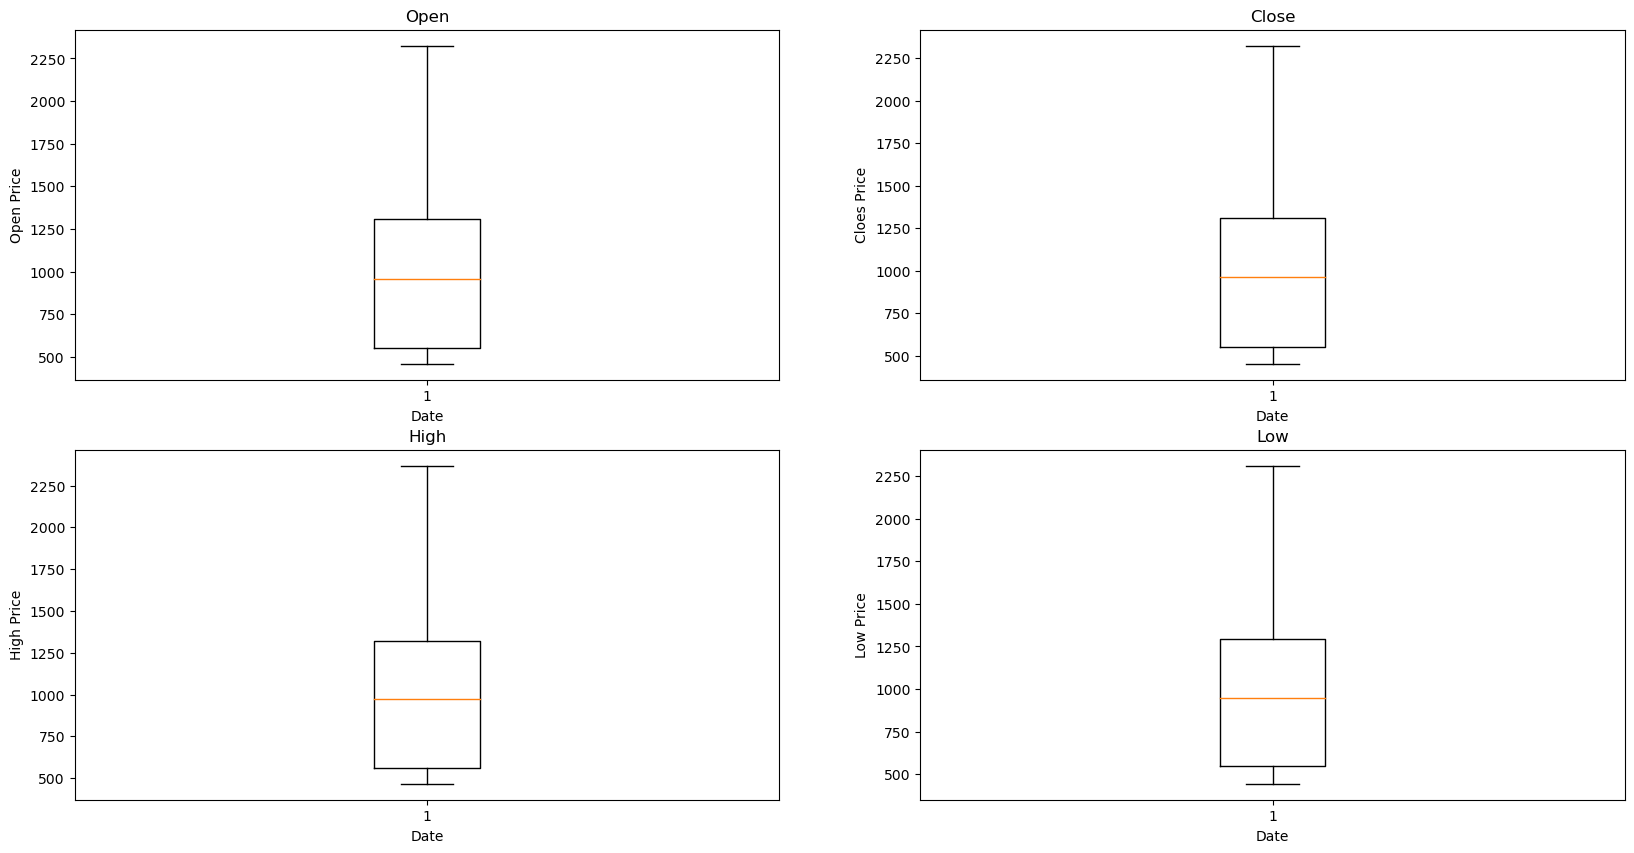

In [230]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(reliance['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(reliance['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(reliance['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(reliance['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

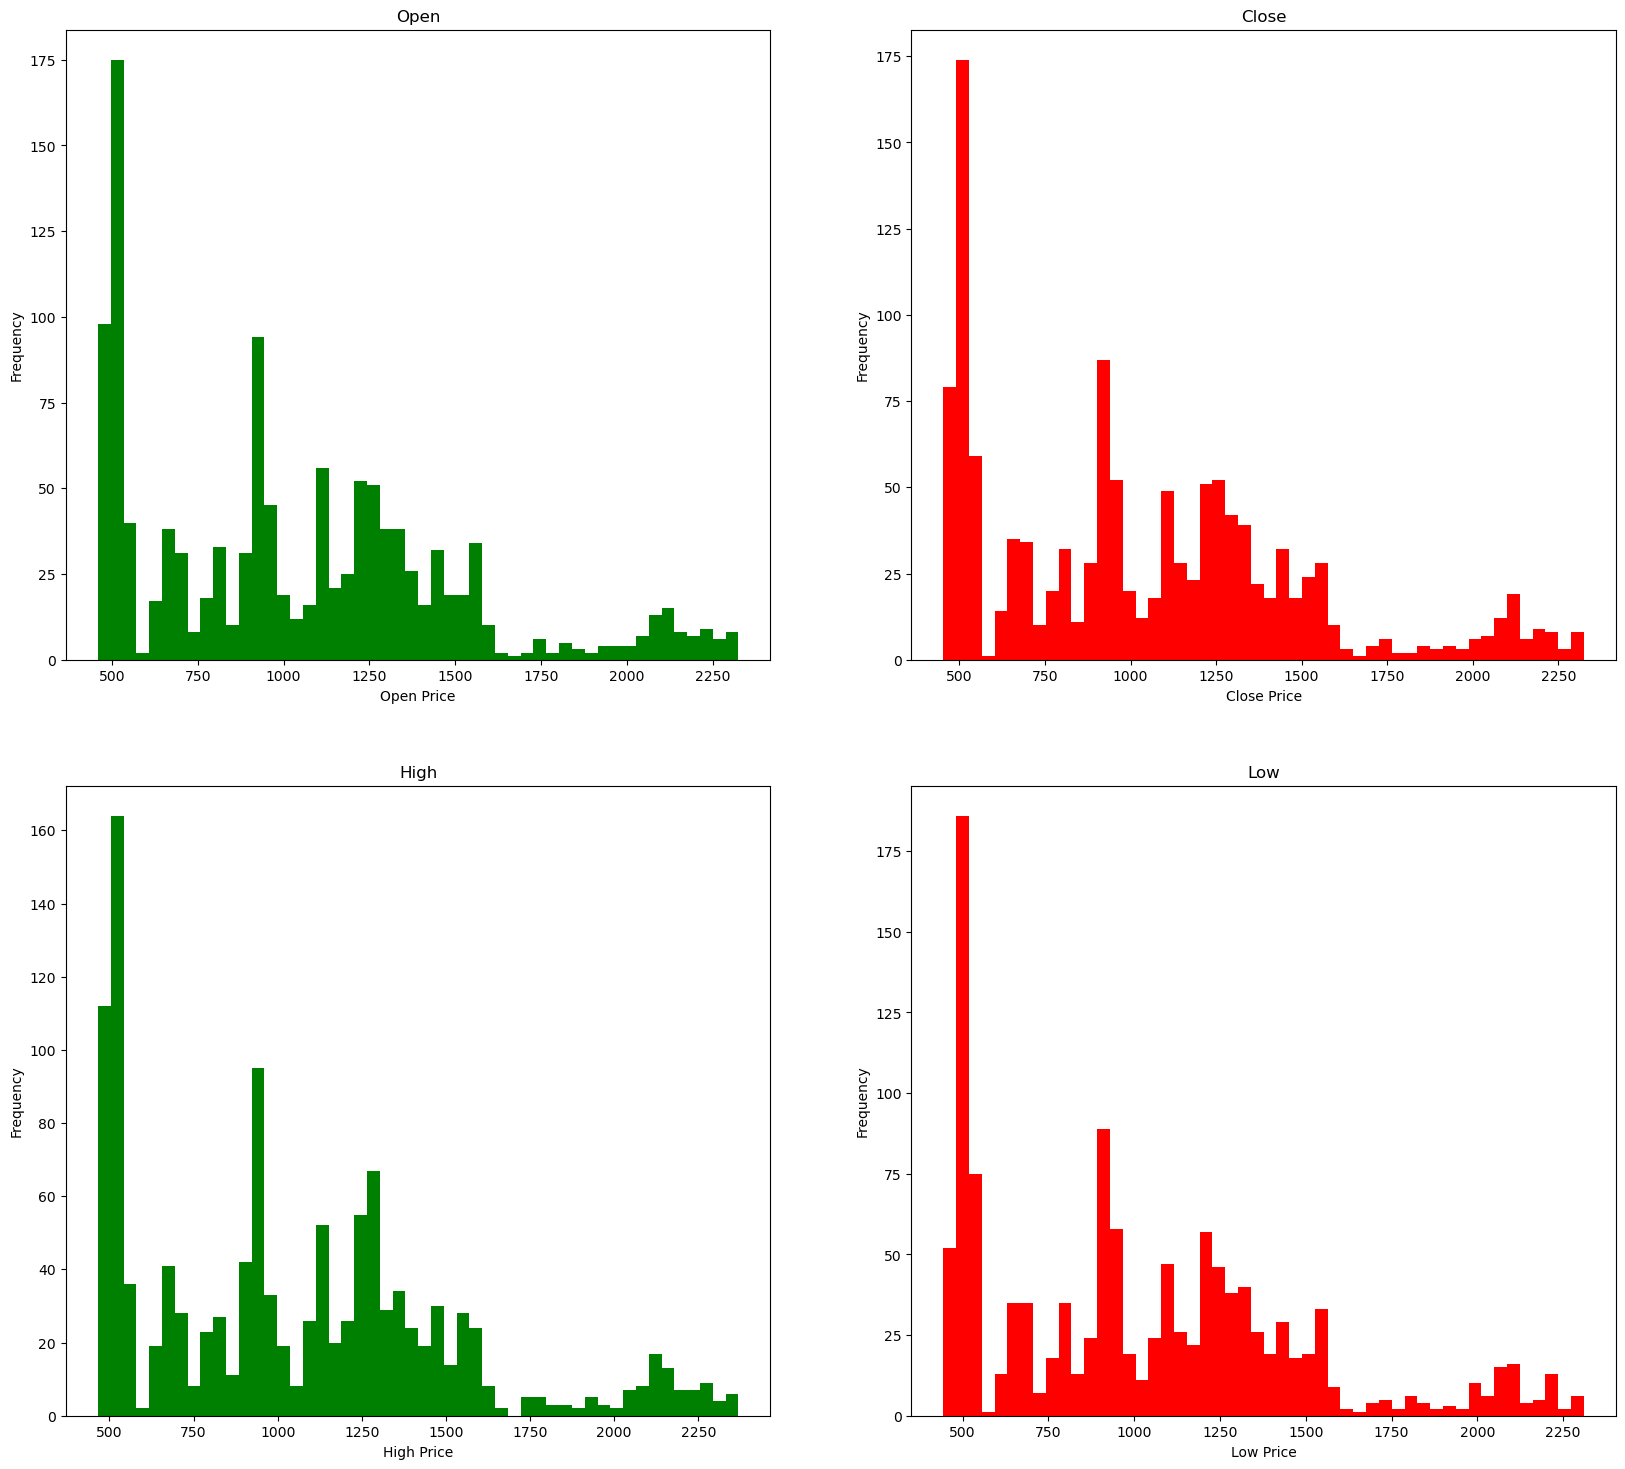

In [231]:
# Ploting Histogram
plt.figure(figsize=(20,18))
#Plot 1
plt.subplot(2,2,1)
plt.hist(reliance['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.hist(reliance['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.hist(reliance['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.hist(reliance['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

Text(0.5, 1.0, 'Low')

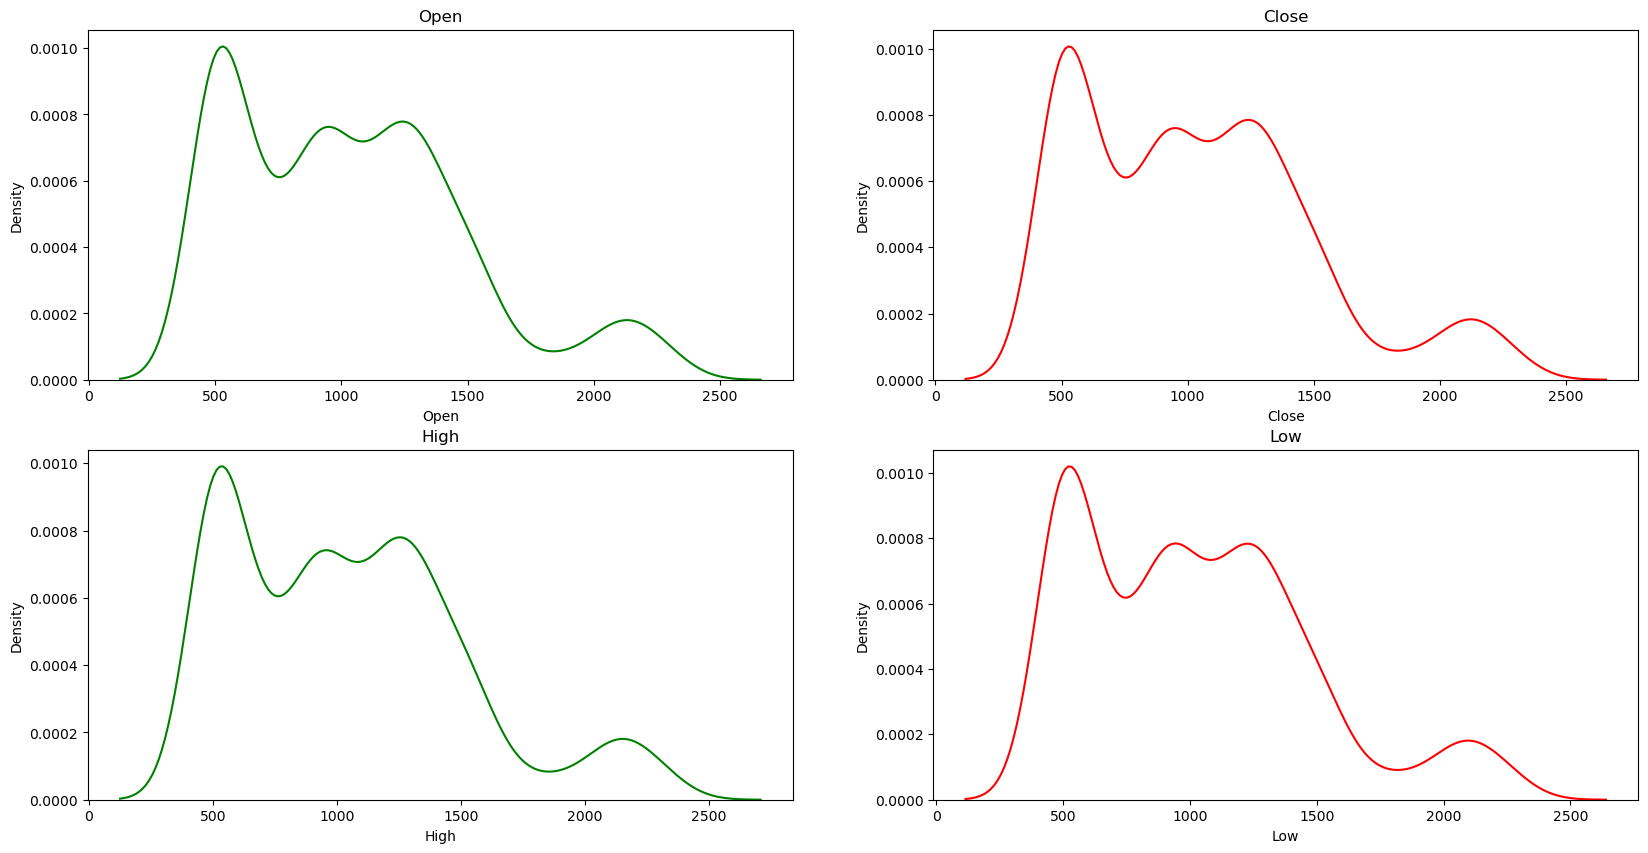

In [232]:
# KDE-Plots(kernal density estimation)
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(reliance['Open'], color='green')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(reliance['Close'], color='red')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
sns.kdeplot(reliance['High'], color='green')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
sns.kdeplot(reliance['Low'], color='red')
plt.title('Low')

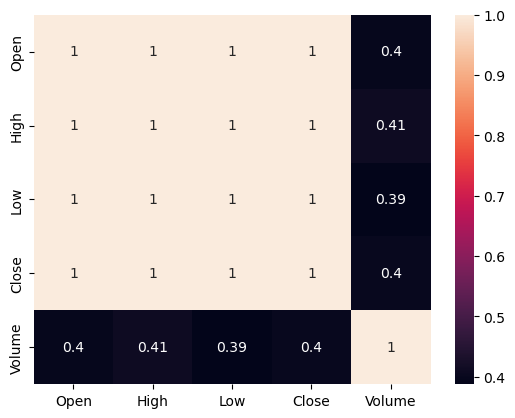

In [233]:
sns.heatmap(reliance.corr(),annot=True)
plt.show()

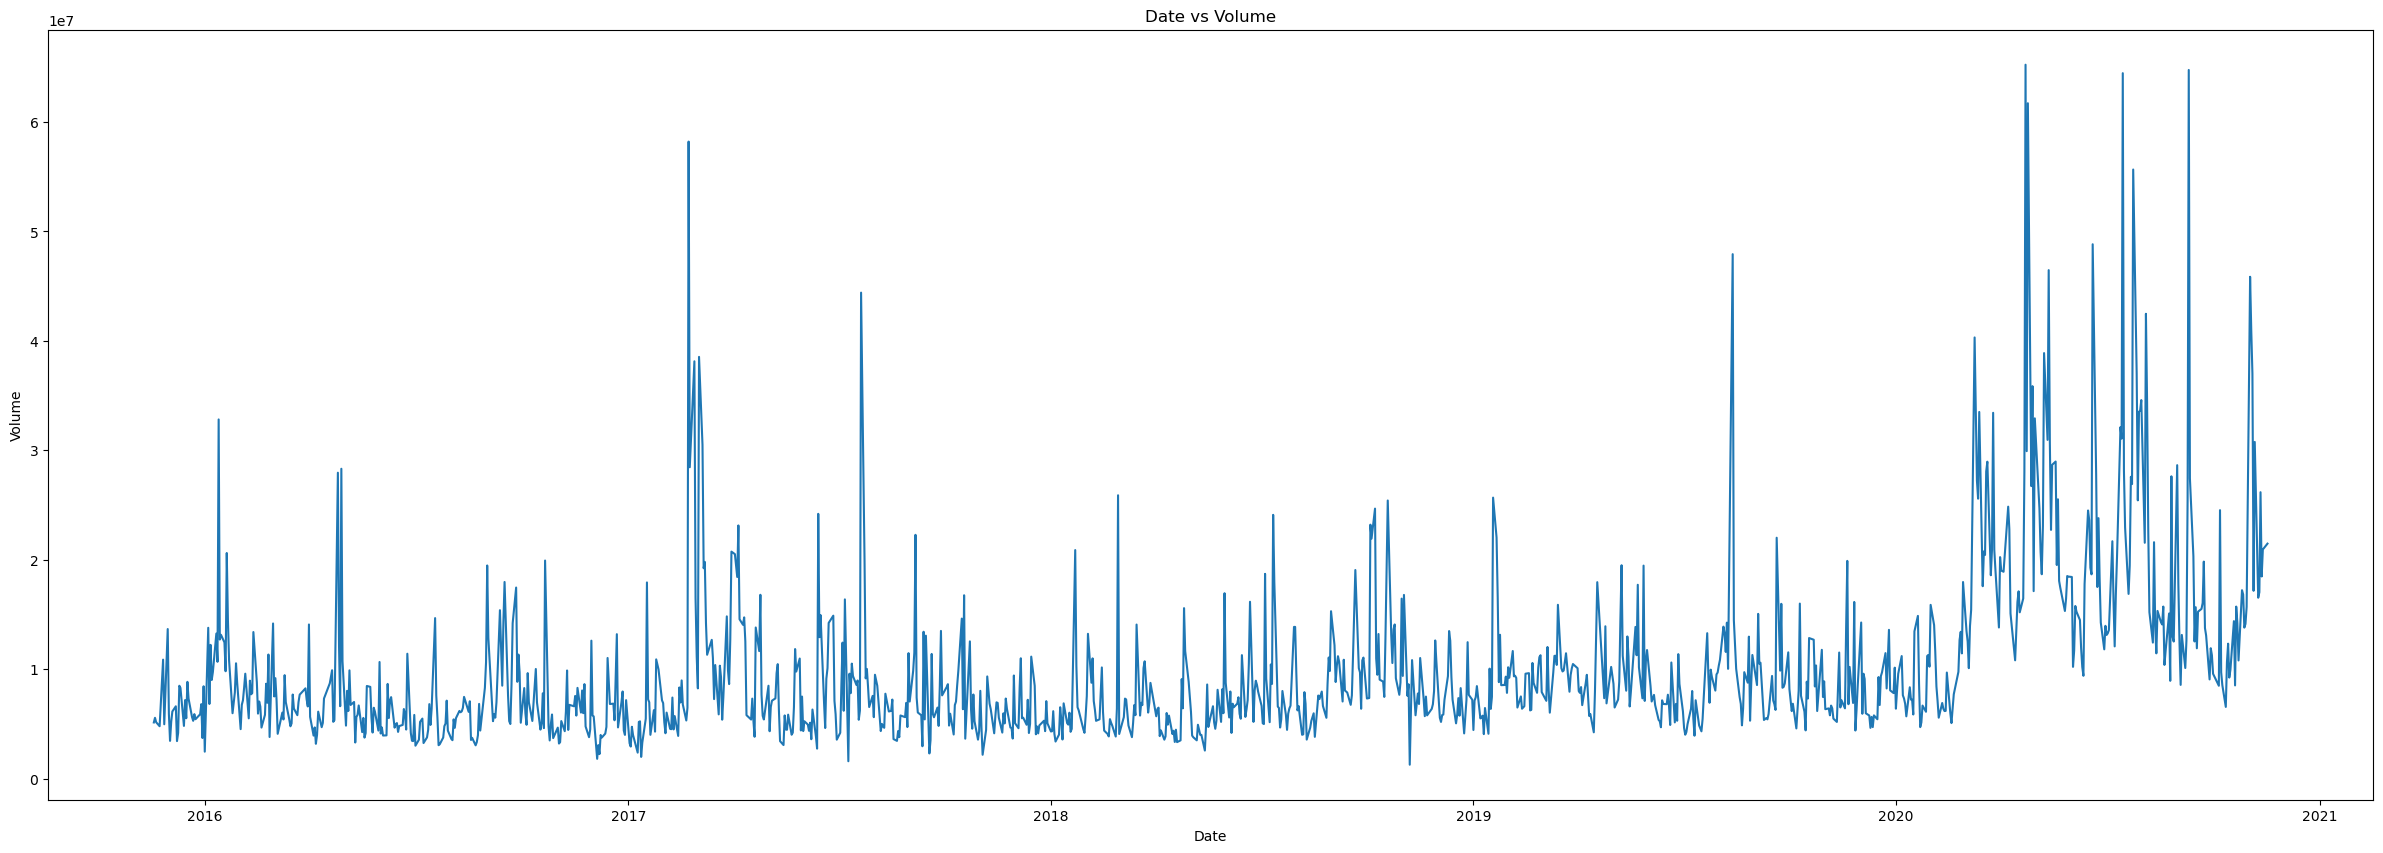

In [234]:
figure=plt.figure(figsize=(30,10))
plt.plot(reliance['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

# Finding long-term and short-term trends
## Moving Average

In [235]:
reliance_ma=reliance.copy()
reliance_ma['30-day MA']=reliance['Close'].rolling(window=30).mean()
reliance_ma['200-day MA']=reliance['Close'].rolling(window=200).mean()
reliance_ma

,Open,High,Low,Close,Volume,30-day MA,200-day MA
Date,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,5142766.0,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,5569752.0,NaN,NaN
2015-11-20,467.000000,476.399994,462.774994,473.424988,5167930.0,NaN,NaN
2015-11-23,475.000000,478.950012,473.100006,476.875000,4800026.0,NaN,NaN
2015-11-24,476.500000,485.799988,475.524994,483.850006,6768886.0,NaN,NaN
...,...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,17045147.0,2121.285002,1721.059958
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,26178477.0,2113.023332,1723.411708
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,18481466.0,2104.544995,1725.703957


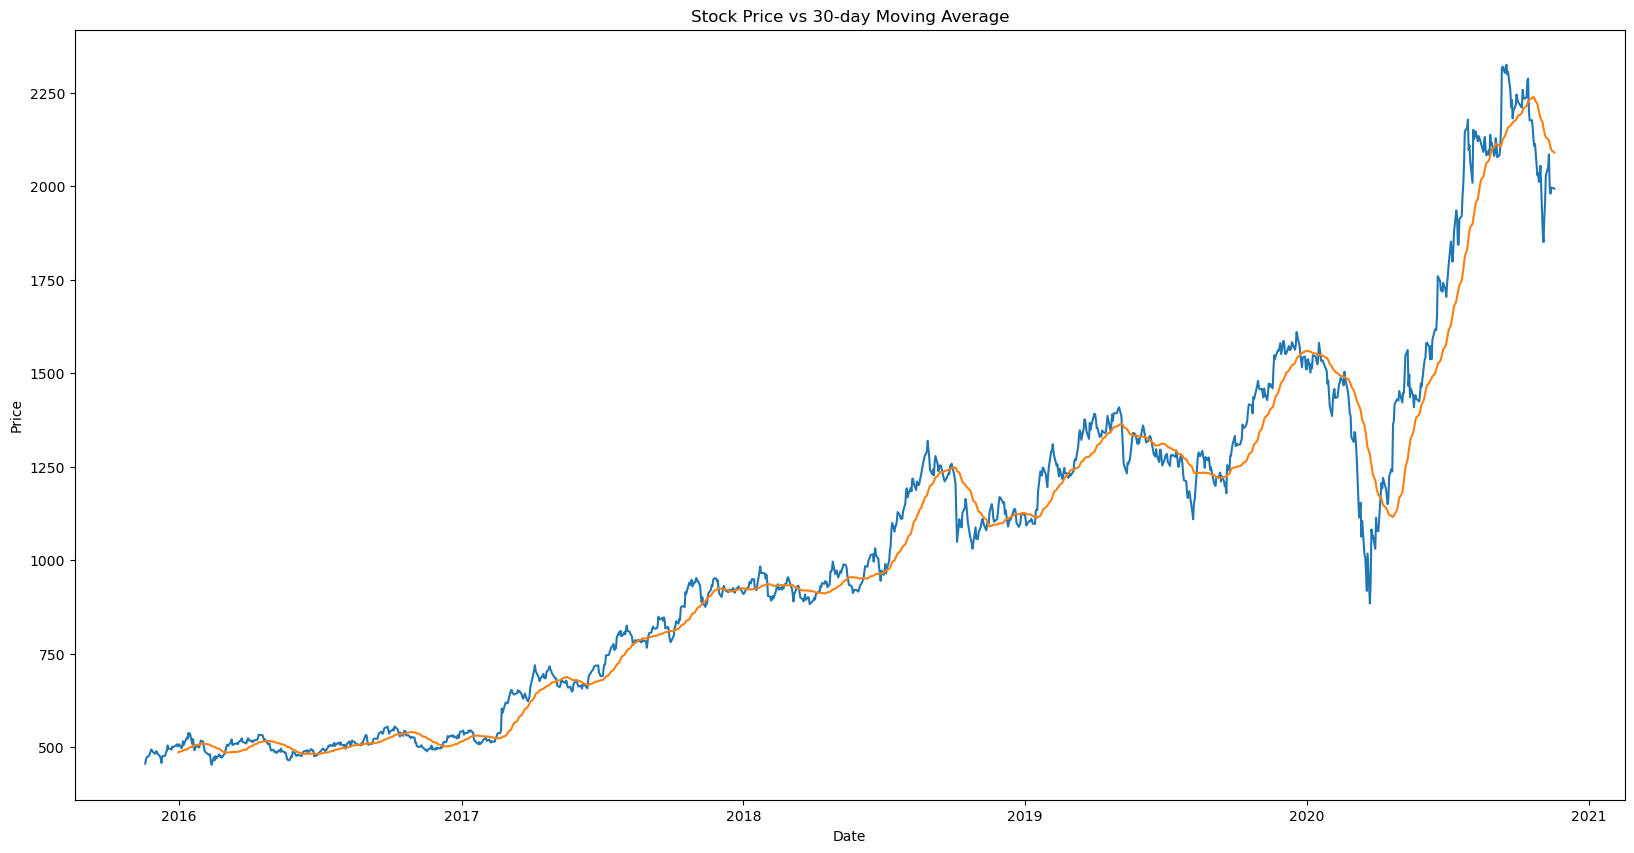

In [236]:
plt.figure(figsize=(20,10))
plt.plot(reliance_ma['Close'],label='Original data')
plt.plot(reliance_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

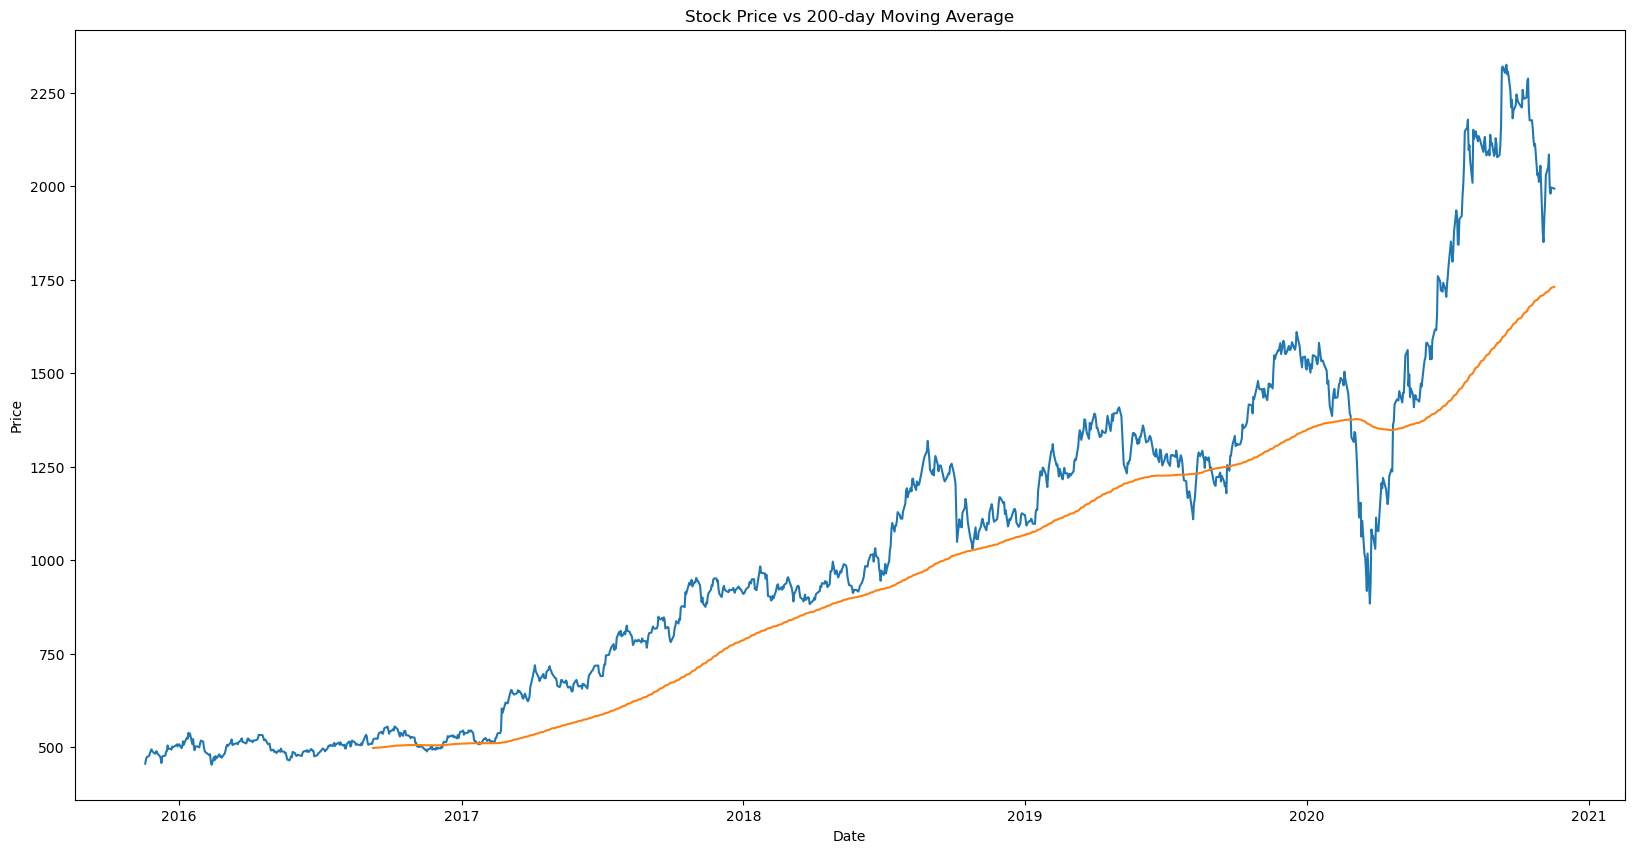

In [237]:
plt.figure(figsize=(20,10))
plt.plot(reliance_ma['Close'],label='Original data')
plt.plot(reliance_ma['200-day MA'],label='200-MA')
plt.legend
plt.title('Stock Price vs 200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Long term and short term trends can be identified using the Moving Average graphs

# Model Building

In [238]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [239]:
reliance

,Open,High,Low,Close,Volume
Date,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,5142766.0
2015-11-19,459.450012,469.350006,458.625000,467.375000,5569752.0
2015-11-20,467.000000,476.399994,462.774994,473.424988,5167930.0
2015-11-23,475.000000,478.950012,473.100006,476.875000,4800026.0
2015-11-24,476.500000,485.799988,475.524994,483.850006,6768886.0
...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,17045147.0
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,26178477.0
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,18481466.0


In [240]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(reliance['Close'])
close_df

,Close
Date,
2015-11-18,456.000000
2015-11-19,467.375000
2015-11-20,473.424988
2015-11-23,476.875000
2015-11-24,483.850006
...,...
2020-11-10,2084.550049
2020-11-11,1997.199951
2020-11-12,1980.000000


In [241]:
print(close_df.shape)


close_df=close_df.reset_index()

(1232, 1)


In [242]:
close_df['Date']

0      2015-11-18
1      2015-11-19
2      2015-11-20
3      2015-11-23
4      2015-11-24
          ...    
1227   2020-11-10
1228   2020-11-11
1229   2020-11-12
1230   2020-11-13
1231   2020-11-17
Name: Date, Length: 1232, dtype: datetime64[ns]

## Normalizing / scaling close value between 0 to 1


In [243]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(1232, 1)


## Split data for training and testing
- Ratio for training and testing data is 86:14

In [244]:
training_size=int(len(closedf)*0.86)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1059, 1)
test_data:  (173, 1)


## Create new dataset according to requirement of time-series prediction

In [245]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [246]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1045, 13)
y_train:  (1045,)
X_test:  (159, 13)
y_test (159,)


## Algorithms
## Support vector regression - SVR

In [247]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [248]:
# Lets Do the prediction 

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1045, 1)
Test data prediction: (159, 1)


In [249]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

## Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [250]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  99.22094949920398
Train data MSE:  9844.796819523586
Test data MAE:  85.16181947617481
-------------------------------------------------------------------------------------
Test data RMSE:  270.67784208243967
Test data MSE:  73266.49419440614
Test data MAE:  248.458452980322


## Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [251]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9253507324745509
Test data explained variance regression score: 0.9069235993199568


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best

0 or < 0 = worse

In [252]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.9150797758739857
Test data R2 score: 0.4102133342379686


# Comparision between original stock close price vs predicted close price

In [253]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='gray', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1232, 1)
Test predicted data:  (1232, 1)


## Predicting next 30 days

In [254]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  30


## Plotting last 15 days and next predicted 30 days

In [255]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [256]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Plotting whole closing stock price with prediction

In [317]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='gray', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Random Forest Regressor - RF

In [258]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [259]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1045, 1)
Test data prediction: (159, 1)


In [260]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

## Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [261]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  6.647541925176667
Train data MSE:  44.189813646981506
Test data MAE:  4.53919332968417
-------------------------------------------------------------------------------------
Test data RMSE:  410.5086033850281
Test data MSE:  168517.31345312632
Test data MAE:  325.97341505817695


## Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [262]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9996188232109784
Test data explained variance regression score: 0.4636670108101667


## R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [263]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9996188231257809
Test data R2 score: -0.3565445640264142


In [316]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='gray', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1232, 1)
Test predicted data:  (1232, 1)


## Predicting next 30 days

In [265]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
    print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  1
Output of predicted next days:  2
Output of predicted next days:  3
Output of predicted next days:  4
Output of predicted next days:  5
Output of predicted next days:  6
Output of predicted next days:  7
Output of predicted next days:  8
Output of predicted next days:  9
Output of predicted next days:  10
Output of predicted next days:  11
Output of predicted next days:  12
Output of predicted next days:  13
Output of predicted next days:  14
Output of predicted next days:  15
Output of predicted next days:  16
Output of predicted next days:  17
Output of predicted next days:  18
Output of predicted next days:  19
Output of predicted next days:  20
Output of predicted next days:  21
Output of predicted next days:  22
Output of predicted next days:  23
Output of predicted next days:  24
Output of predicted next days:  25
Output of predicted next days:  26
Output of predicted next days:  27
Output of predicted next days:  28
Output of predicted next days

## Plotting last 15 days and next predicted 30 days

In [266]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [267]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Plotting whole closing stock price with prediction

In [268]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='gray', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## K-nearest neighgbour - KNN

In [269]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [270]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1045, 1)
Test data prediction: (159, 1)


In [271]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

# Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [272]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  21.13743339688261
Train data MSE:  446.79109060764836
Test data MAE:  14.517545576959883
-------------------------------------------------------------------------------------
Test data RMSE:  430.4116801358284
Test data MSE:  185254.21439734666
Test data MAE:  349.2245043488147


## Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [273]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9961478749265985
Test data explained variance regression score: 0.47869084102296067


# R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [274]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9961460251290647
Test data R2 score: -0.49127464919861774


## Comparision between original stock close price vs predicted close price

In [275]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='gray', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1232, 1)
Test predicted data:  (1232, 1)


## Predicting next 30 days

In [276]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


## Plotting last 15 days and next predicted 30 days

In [277]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [278]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


## Plotting whole closing stock price with prediction

In [279]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='gray', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# LSTM

In [280]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1045, 13, 1)
X_test:  (159, 13, 1)


## LSTM model structure

In [281]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [282]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 13, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [283]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
33/33 [==============================] - 22s 135ms/step - loss: 0.0222 - val_loss: 0.0033
Epoch 2/100
33/33 [==============================] - 1s 30ms/step - loss: 0.0010 - val_loss: 0.0029
Epoch 3/100
33/33 [==============================] - 1s 30ms/step - loss: 6.0391e-04 - val_loss: 0.0035
Epoch 4/100
33/33 [==============================] - 1s 29ms/step - loss: 4.9476e-04 - val_loss: 0.0042
Epoch 5/100
33/33 [==============================] - 1s 29ms/step - loss: 4.9020e-04 - val_loss: 0.0054
Epoch 6/100
33/33 [==============================] - 1s 31ms/step - loss: 4.8107e-04 - val_loss: 0.0061
Epoch 7/100
33/33 [==============================] - 1s 30ms/step - loss: 4.8079e-04 - val_loss: 0.0060
Epoch 8/100
33/33 [==============================] - 1s 30ms/step - loss: 4.7427e-04 - val_loss: 0.0105
Epoch 9/100
33/33 [==============================] - 1s 29ms/step - loss: 4.6978e-04 - val_loss: 0.0093
Epoch 10/100
33/33 [==============================] - 1s 36ms/step - l

33/33 [==============================] - 1s 34ms/step - loss: 2.0722e-04 - val_loss: 0.0026
Epoch 80/100
33/33 [==============================] - 1s 32ms/step - loss: 1.8509e-04 - val_loss: 0.0013
Epoch 81/100
33/33 [==============================] - 1s 30ms/step - loss: 1.7387e-04 - val_loss: 0.0011
Epoch 82/100
33/33 [==============================] - 1s 32ms/step - loss: 1.6964e-04 - val_loss: 0.0018
Epoch 83/100
33/33 [==============================] - 1s 30ms/step - loss: 1.6611e-04 - val_loss: 0.0018
Epoch 84/100
33/33 [==============================] - 1s 31ms/step - loss: 1.6216e-04 - val_loss: 0.0014
Epoch 85/100
33/33 [==============================] - 1s 31ms/step - loss: 1.5646e-04 - val_loss: 0.0021
Epoch 86/100
33/33 [==============================] - 1s 30ms/step - loss: 1.5492e-04 - val_loss: 0.0020
Epoch 87/100
33/33 [==============================] - 1s 30ms/step - loss: 1.4485e-04 - val_loss: 9.9284e-04
Epoch 88/100
33/33 [==============================] - 1s 31ms/st

In [284]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 12ms/step


((1045, 1), (159, 1))

In [285]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

 # Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [286]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  19.858800610086927
Train data MSE:  394.37196167118896
Test data MAE:  14.491304374269212
-------------------------------------------------------------------------------------
Test data RMSE:  78.8383608084367
Test data MSE:  6215.487134961248
Test data MAE:  66.01600965055032


## Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [287]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9966513654535605
Test data explained variance regression score: 0.9779060768984305


## R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [288]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.9965981872467172
Test data R2 score: 0.9499660591963266


## Comparision between original stock close price vs predicted close price

In [289]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='gray', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1232, 1)
Test predicted data:  (1232, 1)


## Predicting next 30 days

In [290]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [291]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [292]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


## Plotting whole closing stock price with prediction

In [293]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='gray', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## GRU (Gated Recurrent Unit)

In [294]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1045, 13, 1)
X_test:  (159, 13, 1)


In [295]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [296]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 13, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [297]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
33/33 [==============================] - 18s 135ms/step - loss: 0.0160 - val_loss: 0.0017
Epoch 2/100
33/33 [==============================] - 1s 38ms/step - loss: 6.1494e-04 - val_loss: 0.0035
Epoch 3/100
33/33 [==============================] - 1s 37ms/step - loss: 3.1857e-04 - val_loss: 0.0028
Epoch 4/100
33/33 [==============================] - 1s 37ms/step - loss: 3.1315e-04 - val_loss: 0.0028
Epoch 5/100
33/33 [==============================] - 1s 40ms/step - loss: 3.0701e-04 - val_loss: 0.0029
Epoch 6/100
33/33 [==============================] - 1s 37ms/step - loss: 3.0330e-04 - val_loss: 0.0030
Epoch 7/100
33/33 [==============================] - 1s 37ms/step - loss: 2.9320e-04 - val_loss: 0.0026
Epoch 8/100
33/33 [==============================] - 1s 35ms/step - loss: 2.9952e-04 - val_loss: 0.0019
Epoch 9/100
33/33 [==============================] - 1s 36ms/step - loss: 3.0607e-04 - val_loss: 0.0037
Epoch 10/100
33/33 [==============================] - 1s 33ms/step

33/33 [==============================] - 1s 28ms/step - loss: 8.7049e-05 - val_loss: 0.0012
Epoch 79/100
33/33 [==============================] - 1s 31ms/step - loss: 1.0174e-04 - val_loss: 0.0011
Epoch 80/100
33/33 [==============================] - 1s 29ms/step - loss: 1.2205e-04 - val_loss: 0.0012
Epoch 81/100
33/33 [==============================] - 1s 29ms/step - loss: 1.1123e-04 - val_loss: 0.0012
Epoch 82/100
33/33 [==============================] - 1s 30ms/step - loss: 8.9501e-05 - val_loss: 0.0010
Epoch 83/100
33/33 [==============================] - 1s 29ms/step - loss: 8.3630e-05 - val_loss: 9.7859e-04
Epoch 84/100
33/33 [==============================] - 1s 28ms/step - loss: 8.6865e-05 - val_loss: 9.4291e-04
Epoch 85/100
33/33 [==============================] - 1s 29ms/step - loss: 8.3494e-05 - val_loss: 6.5301e-04
Epoch 86/100
33/33 [==============================] - 1s 29ms/step - loss: 1.0170e-04 - val_loss: 0.0013
Epoch 87/100
33/33 [==============================] - 1s

In [298]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 8ms/step


((1045, 1), (159, 1))

In [299]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

# Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [300]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  16.78939302239912
Train data MSE:  281.88371806058433
Test data MAE:  11.963457321435778
-------------------------------------------------------------------------------------
Test data RMSE:  50.07030555658136
Test data MSE:  2507.035498529422
Test data MAE:  39.168413310043235


# Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [301]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9976743781138504
Test data explained variance regression score: 0.982938447214748


 ## R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [302]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.9975684994871903
Test data R2 score: 0.9798186589397694


## Comparision between original stock close price vs predicted close price

In [303]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='gray', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1232, 1)
Test predicted data:  (1232, 1)


In [304]:
plotdf.head(100)

,Date,original_close,train_predicted_close,test_predicted_close
0,2015-11-18,456.000000,NaN,NaN
1,2015-11-19,467.375000,NaN,NaN
2,2015-11-20,473.424988,NaN,NaN
3,2015-11-23,476.875000,NaN,NaN
4,2015-11-24,483.850006,NaN,NaN
...,...,...,...,...
95,2016-04-07,518.625000,517.004089,NaN
96,2016-04-08,518.174988,518.827026,NaN
97,2016-04-11,520.150024,519.265869,NaN
98,2016-04-12,523.700012,520.425171,NaN


# Predicting next 30 days

In [305]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


# Plotting last 15 days and next predicted 30 days

In [306]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [307]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Plotting whole closing stock price with prediction

In [308]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='gray', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [309]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

,svr,rf,knn,lstm,gru
0,456.000000,456.000000,456.000000,456.000000,456.000000
1,467.375000,467.375000,467.375000,467.375000,467.375000
2,473.424988,473.424988,473.424988,473.424988,473.424988
3,476.875000,476.875000,476.875000,476.875000,476.875000
4,483.850006,483.850006,483.850006,483.850006,483.850006
...,...,...,...,...,...
1257,1326.255531,1585.728470,1547.738450,1538.656209,1756.699721
1258,1316.012887,1585.478970,1542.661537,1535.199688,1754.200853
1259,1306.667330,1585.478970,1534.265381,1531.523661,1751.859252
1260,1297.567320,1585.478970,1533.080773,1527.312259,1749.663764


# Conclusion Chart

In [310]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:], 
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart',plot_bgcolor='white' ,font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [311]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

,Model,Train R2 Score,Test R2 Score
0,SVR,0.915080,0.410213
1,Random Forest,0.999619,-0.356545
2,KNN,0.996146,-0.491275
3,LSTM,0.996598,0.949966
4,GRU,0.997568,0.979819


### By Looking into this table we can say that our LSTM model have best R2 score.
### so we are going to use LSTM model for our deployment part.

###  Code for Binary coded file creation for streamlit deployment

In [312]:
import pickle

In [313]:
from pickle import dump


In [314]:
file_path="LSTM.pkl"

In [315]:
with open(file_path, "wb") as f:
    pickle.dump(LSTM,f)